## 12. Дифференциальные уравнения. Робин Гуд
Робин Гуд бросает камень с привязанным к нему письмом
через бойницу крепостной стены в открытое окно, стоящего за ней замка:
``` 
                    стена                    замок
                    _____ 
                   [     ]                  ______ 
                   [     ]                 [      ]
                   [_____]                 [      ]
                   бойница                 [      ]
                    _____                  [      ]
                   [     ]                 [      ]
                   [     ]                   окно ]
                   [     ]                 [      ]
                   [     ]                 [      ]
.                  [     ]                 [      ]
 \0 _              [     ]                 [      ]
  I                [     ]                 [      ]
 / \               [     ]                 [      ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
```

Смоделируйте полет камня с помощью функции `integrate.ode`.
Рассмотрите следующие события: 
   1. камень упал на землю, не долетев до окна (либо до, либо после стены);
   2. камень не попал в бойницу (ударился о стену);
   3. камень застрял в бойнице (стукнулся о <<пол>> или <<потолок>> бойницы и упал внутри нее); 
   4. камень стукнулся о  стену замка (не попав в окно);
   5. камень попал в окно 
      (для простоты считаем, что и крепостная стена, и замок очень высокие
      и сверху через них камень перебросить нельзя).
При наступлении каждого из этих событий вычисления прекращаются. 

Написать функцию, на вход которой подаются:
  * параметры:
    масса камня,
    расстояние от Робин Гуда до стены,
    толщину стены (равную длине бойницы),
    расстояние от земли до бойницы и высоту бойницы,
    расстояние от стены до замка,
    расстояние от земли до окна и высоту окна,

  * начальные условия:
    угол броска и начальную скорость камня.

Программа должна отображать «вид сбоку» (многоугольники можно нарисовать с помощью функций
`matplotlib.patches.Patch`) и траекторию полета.

# В самом коде уже указаны комментарии, особо расписывать нечего. Дифференциальная система представлена чуть ниже, я не думаю, что это стоит выносить в отдельную картинку, она самая обычная :) 
Была использована функция solve_ivp для решения системы, код переписал, чтобы не было никаких вопросов (я думаю, вы понимаете, о чем я говорю)

(8, 12) (9, 12) (8, 15) (9, 15)
(12, 8) (13, 8) (12, 10) (13, 10)
12
14.618585236136843
13
14.618585236136843
не долетел


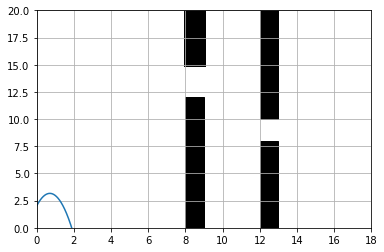

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from math import sin, cos, pi, sqrt;
import matplotlib.patches as patches

import math
from scipy import integrate





def robin_diff(v0, angle, x0, y0, wall_dist, wall_width, wall_height , wall_window_height, wall_castle_dist, 
               castle_height , castle_width, castle_window_height):
    #дифференциальные уравнения полета камня 
    def f(t, r):
        v0x = v0 * math.cos(alpha)
        v0y = v0 * math.sin(alpha)
        vx = v0 * math.cos(alpha)
        vy = v0 * math.sin(alpha) - g * t 

        return vx, vy
    g = 9.8
    alpha = math.pi * angle / 180
    v0x = v0 * math.cos(alpha)
    v0y = v0 * math.sin(alpha) 
    sol = integrate.solve_ivp(f, (0,10), (x0, y0), t_eval = np.linspace(0, 10, 5000))

    x, y = sol.y
    x_stop = x
    y_stop = y
    #находим точки стены и замка(сначала нижние левые, затем нижние правые, затем также верхние.)
    wall1_p1 = (wall_dist, wall_height)
    wall1_p2 = (wall_dist + wall_width, wall_height)
    wall2_p1 = (wall_dist, wall_height + wall_window_height)
    wall2_p2 = (wall_dist + wall_width, wall_height + wall_window_height)
    #проверяем правильно ли обнаружены точки
    print(wall1_p1, wall1_p2, wall2_p1, wall2_p2)
    #Затем находим также для замка
    castle1_p1 = (wall_dist + wall_width + wall_castle_dist, castle_height)
    castle1_p2 = (wall_dist + wall_width + wall_castle_dist + castle_width, castle_height)
    castle2_p1 = (wall_dist + wall_width + wall_castle_dist, castle_height + castle_window_height)
    castle2_p2 = (wall_dist + wall_width + wall_castle_dist + castle_width, castle_height + castle_window_height)
    #проверяем правильно ли обнаружены точки
    print(castle1_p1, castle1_p2, castle2_p1, castle2_p2)

    # Формулы
    
    #находим значение y на расстоянии входа в бойницу
    def y_in_wall(wall_dist):
        i = 0
        for j in x:
            if max(x) < wall_dist:
                maximum = np.max(x)
                index_of_maximum = np.where(x == maximum)
                d = {'value': y[index_of_maximum], 'index': index_of_maximum}
                return d
            elif x[i] == wall_dist:
                d = {'value': y[i], 'index': i}
                return d
            elif x[i] < wall_dist and x[i+1] > wall_dist:
                d = {'value': y[i], 'index': i}
                return d
            i += 1
    #находим значение x на расстоянии входа в бойницу(не понадобилось)
    def x_in_wall(wall_dist):
        i = 0
        for j in x:
            if max(x) < wall_dist:
                maximum = np.max(x)
                index_of_maximum = np.where(x == maximum)
                d = {'value': max(x), 'index': index_of_maximum}
            elif x[i] == wall_dist:
                d = {'value': x[i], 'index': i}
                return d
            elif x[i] < wall_dist and x[i+1] > wall_dist:
                d = {'value': x[i], 'index': i}
                return d
            i += 1
    #находим значение y на расстоянии входа в замок
    def y_in_castle(wall_dist, wall_width, wall_castle_dist):
        i = 0
        for j in x:
            if max(x) < wall_dist + wall_width + wall_castle_dist:
                maximum = np.max(x)
                index_of_maximum = np.where(x == maximum)
                d = {'value': y[index_of_maximum], 'index': index_of_maximum}
                return d
            elif x[i] == wall_dist + wall_width + wall_castle_dist:
                d = {'value': y[i], 'index': i}
                return d
            elif x[i] < wall_dist + wall_width + wall_castle_dist and x[i+1] > wall_dist + wall_width + wall_castle_dist:
                d = {'value': y[i], 'index': i}
                return d
            i += 1
    #находим значение x на расстоянии входа в замок(не понадобилось)
    def x_in_castle(wall_dist, wall_width, wall_castle_dist):
        i = 0
        print(wall_dist + wall_width + wall_castle_dist)
        print(max(x))
        for j in x:
            if max(x) < wall_dist + wall_width + wall_castle_dist:
                maximum = np.max(x)
                index_of_maximum = np.where(x == maximum)
                d = {'value': max(x), 'index': index_of_maximum}
                return d
            elif x[i] == wall_dist + wall_width + wall_castle_dist:
                d = {'value': x[i], 'index': i}
                return d
            elif x[i] < wall_dist + wall_width + wall_castle_dist and x[i+1] > wall_dist + wall_width + wall_castle_dist:
                d = {'value': x[i], 'index': i}
                return d

            i += 1
     # отрисовка        
    
    #отрисовка стены и замка
    wall_bottom = patches.Rectangle((wall_dist, 0),
                                wall_width, wall_height,
                                edgecolor='black', facecolor='black')
    wall_top = patches.Rectangle((wall_dist, wall_height+wall_window_height),
                             wall_width, wall_height,
                             linewidth=3, edgecolor='black', facecolor='black')
    castle_bottom = patches.Rectangle((wall_dist+wall_width+wall_castle_dist, 0),
                                  castle_width, castle_height,
                                  edgecolor='black', facecolor='black')
    castle_top = patches.Rectangle((wall_dist+wall_width+wall_castle_dist, castle_height+castle_window_height),
                               castle_width, wall_height,
                               edgecolor='black', facecolor='black')
    # fig = plt.figure(figsize=(16, 12))

    _, ax = plt.subplots()
    ax.add_patch(wall_bottom)
    ax.add_patch(wall_top)
    ax.add_patch(castle_bottom)
    ax.add_patch(castle_top)
    #флажок попадания

    # находим значения по формулам 
    
    x_in1 = x_in_wall(wall_dist)
    y_in1 = y_in_wall(wall_dist)
    x_in2 = x_in_castle(wall_dist, wall_width, wall_castle_dist)
    y_in2 = y_in_castle(wall_dist, wall_width, wall_castle_dist)
    x_out1 = x_in_wall(wall_dist + wall_width)
    y_out1 = y_in_wall(wall_dist + wall_width)
    x_out2 = x_in_castle(wall_dist, wall_width, wall_castle_dist + castle_width)
    y_out2 = y_in_castle(wall_dist, wall_width, wall_castle_dist + castle_width)
    
    #если при входе в бойницу y находится на земле то не долетел
    
    if y_in1['value'] <= 0:
        print("не долетел")

    else:
        #если при входе в бойницу y находится над нижней точкой бойницы и под верхней
        if y_in1['value'] > wall_height and y_in1['value'] < wall_height + wall_window_height:
            print("попали в бойницу")
            #если на всей ширине бойницы y находится над нижней точкой бойницы и под верхней
            if min(y[y_in1['index']:y_out1['index']]) > wall_height and max(y[y_in1['index']:y_out1['index']]) < wall_height + wall_window_height:
                print("башню прошли")
                #если при входе в замок камень не на земле
                if y_in2['value'] > 0:
                    #если при входе в замок y находится над нижней точкой окна и под верхней
                    if y_in2['value'] > castle_height and y_in2['value'] < castle_height + castle_window_height:
                        print("попали в окно")
                    else:
                        #если при входе в замок y находится над нижней точкой окна и под верхней(не выолняется)
                        print("не попали в окно")
                        i = y_in2['index']
                        x_stop = x[0:i]
                        y_stop = y[0:i]
                else:
                     #если при входе в замок камень на земле(не выолняется)
                    print("не долетел до окна")

            else:
                #если на всей ширине бойницы y находится над нижней точкой бойницы и под верхней(не выолняется)
                print("ударился об пол или потолок")
                i = y_in1['index']
                x_stop = x[0:i]
                y_stop = y[0:i]
                sucess_wall = 0
        else:
            #если при входе в бойницу y находится над нижней точкой бойницы и под верхней(не выолняется)
            print("не попали в бойницу")
            i = y_in1['index']
            x_stop = x[0:i]
            y_stop = y[0:i]
            sucess_wall = 0
            plt.plot(x_stop, y_stop)
            plt.axis([0, 5 + wall_dist + wall_width + wall_castle_dist + castle_width, 0, 5 + max(castle_height + castle_window_height,wall_height + wall_window_height)]) 
            plt.grid()
            return 0

        

    plt.plot(x_stop, y_stop)
    plt.axis([0, 5 + wall_dist + wall_width + wall_castle_dist + castle_width, 0, 5 + max(castle_height + castle_window_height,wall_height + wall_window_height)]) 
    plt.grid()




    plt.show()
    
#robin_diff( скорость, угол, точка броска Х, точка броска У, растт до стены, ширина стены, высота стены
#, ВЫСОТА ОКНА СТЕНЫ, растт до замка, высота замка , ширина замка, высота окна замка )
robin_diff(5, 73, 0, 2,8, 1, 12 , 3, 3, 8 , 1, 2 )


(8, 12) (9, 12) (8, 15) (9, 15)
(12, 8) (13, 8) (12, 10) (13, 10)
12
25.02951440643699
13
25.02951440643699
не попали в бойницу


0

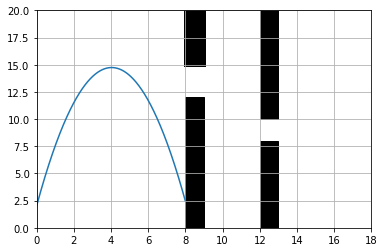

In [3]:
robin_diff(16, 81, 0, 2,8, 1, 12 , 3, 3, 8 , 1, 2 )

(8, 12) (9, 12) (8, 15) (9, 15)
(12, 8) (13, 8) (12, 10) (13, 10)
12
58.47434094454742
13
58.47434094454742
не попали в бойницу


0

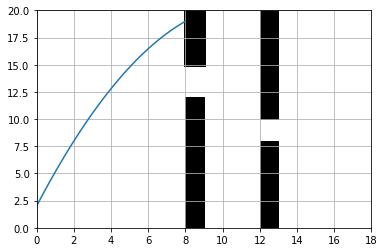

In [4]:
robin_diff(20, 73, 0, 2,8, 1, 12 , 3, 3, 8 , 1, 2 )

(8, 12) (9, 12) (8, 15) (9, 15)
(12, 8) (13, 8) (12, 10) (13, 10)
12
57.338871927248185
13
57.338871927248185
попали в бойницу
башню прошли
не попали в окно


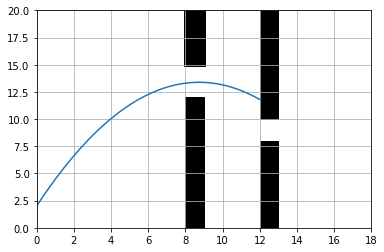

In [8]:
robin_diff(16, 69, 0, 2,8, 1, 12 , 3, 3, 8 , 1, 2 )

(8, 12) (9, 12) (8, 15) (9, 15)
(12, 8) (13, 8) (12, 10) (13, 10)
12
30.529439260247138
13
30.529439260247138
не попали в бойницу


0

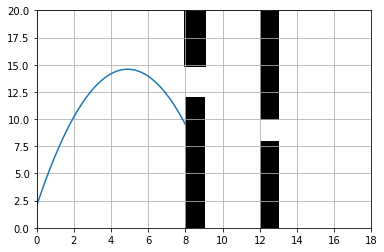

In [6]:
robin_diff(16, 79, 0, 2,8, 1, 12 , 3, 3, 8 , 1, 2 )

(8, 12) (9, 12) (8, 15) (9, 15)
(12, 8) (13, 8) (12, 10) (13, 10)
12
46.7794727556379
13
46.7794727556379
попали в бойницу
башню прошли
попали в окно


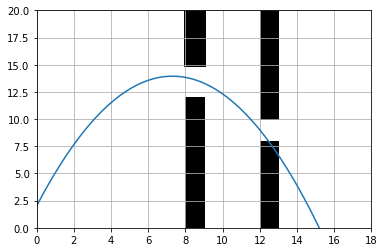

In [11]:
robin_diff(16, 73, 0, 2,8, 1, 12 , 3, 3, 8 , 1, 2 )

In [ ]:
Ну вот и все :)